In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('ipl.csv')

In [3]:
df

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


In [4]:
# --- Data Cleaning ---
# Removing unwanted columns

In [5]:
columns_to_remove = ['mid', 'batsman', 'bowler', 'striker', 'non-striker'] #also try to speculate why these are removed not exp by krish(my guess is as if we dont remove batsman,bowler etc names the curent players(for prediction) will be obviously youngsters new but we have trained the model for previous players and not for new so not good)
df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [6]:
# Keeping only consistent teams that are playing these years   
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [7]:
# Removing the first 5 overs data in every match
df = df[df['overs']>=5.0]

In [8]:
df.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [9]:
# Converting the column 'date' from string into datetime object(important)
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [16]:
#one hot encoding
enc=['bat_team','bowl_team','venue']
encoded_df=pd.get_dummies(df,columns=enc)

In [17]:
encoded_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,"venue_Rajiv Gandhi International Stadium, Uppal","venue_Sardar Patel Stadium, Motera",venue_Sawai Mansingh Stadium,venue_Shaheed Veer Narayan Singh International Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_St George's Park,venue_Subrata Roy Sahara Stadium,venue_SuperSport Park,venue_Wankhede Stadium
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:

# Splitting the data into train and test set
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]

In [19]:

y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

In [20]:
# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

## Linear model

In [34]:
# --- Model Building ---
# Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
prediction_lin=regressor.predict(X_test)

In [36]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction_lin))
print('MSE:', metrics.mean_squared_error(y_test, prediction_lin))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_lin)))

MAE: 12.435454794728395
MSE: 276.7459659445243
RMSE: 16.635683512994717


## Ridge regression 

In [37]:
## Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [38]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

C:\Users\Pablo\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.56401e-23): result may not be accurate.
  overwrite_a=True).T
C:\Users\Pablo\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.45333e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Pablo\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.47808e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Pablo\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.42688e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Pablo\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.56401e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Pablo\anaconda3\lib\site-packages\sklearn\linear_mo

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [39]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)


{'alpha': 40}
-338.35470543710437


In [47]:
prediction_r=ridge_regressor.predict(X_test)

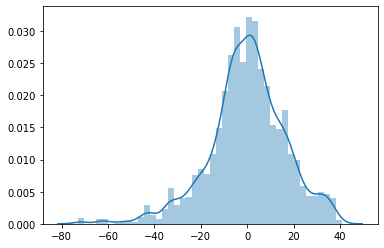

In [48]:
import seaborn as sns
sns.distplot(y_test-prediction)   ##plotting the differece between prediction and original 

In [49]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction_r))
print('MSE:', metrics.mean_squared_error(y_test, prediction_r))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_r)))

MAE: 12.39627973789317
MSE: 274.4084469631991
RMSE: 16.565278354534193


## Lasso regression

In [50]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [51]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)


C:\Users\Pablo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4281149.044166838, tolerance: 2529.9556965945626
  positive)
C:\Users\Pablo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4178105.399956766, tolerance: 2547.0380710286627
  positive)
C:\Users\Pablo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4077199.6798518864, tolerance: 2667.8126904366463
  positive)
C:\Users\Pablo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

{'alpha': 1}
-320.82214916809124


In [52]:
prediction_l=lasso_regressor.predict(X_test)

In [53]:
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, prediction_l))
print('MSE:', metrics.mean_squared_error(y_test, prediction_l))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_l)))

MAE: 12.213583996827493
MSE: 262.3653827960697
RMSE: 16.197696836157593
